In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Linear regression with SGD

In [2]:
class SimpleLinearRegression_SGD:
    def __init__(self):
        pass
        
    # Class methods
    def fit(self, X, y, α=0.1, max_iter=int(1e4)):
        # Dimensions of the dataset
        m, n = X.shape
        
        # Shuffle the rows of the training data
        data = np.hstack((X,y.reshape((-1,1))))
        np.random.shuffle(data)

        X = data[:,0].reshape((-1,1))
        y = data[:,1]
        
        # Stochastic gradient descent step
        ## Initialize the weight and the bias
        w = np.random.rand(n)
        b = 0
        
        for iteration in range(max_iter):
            for i in range(m):
                # Notice that there are no sums unlike in batch gradient descent
                w = w - α * (self.__h(X[i], w, b) - y[i]) * X[i]
                b = b - α * (self.__h(X[i], w, b) - y[i])
        
        
        # Final weights   
        self.w = w
        self.b = b
        
        
    ## For making predictions
    def predict(self, x_new):
        return self.w * x_new + self.b
            
        
    # Private methods
    def __h(self, x, w, b):
        return w * x + b

### Test out the function

<IPython.core.display.Javascript object>


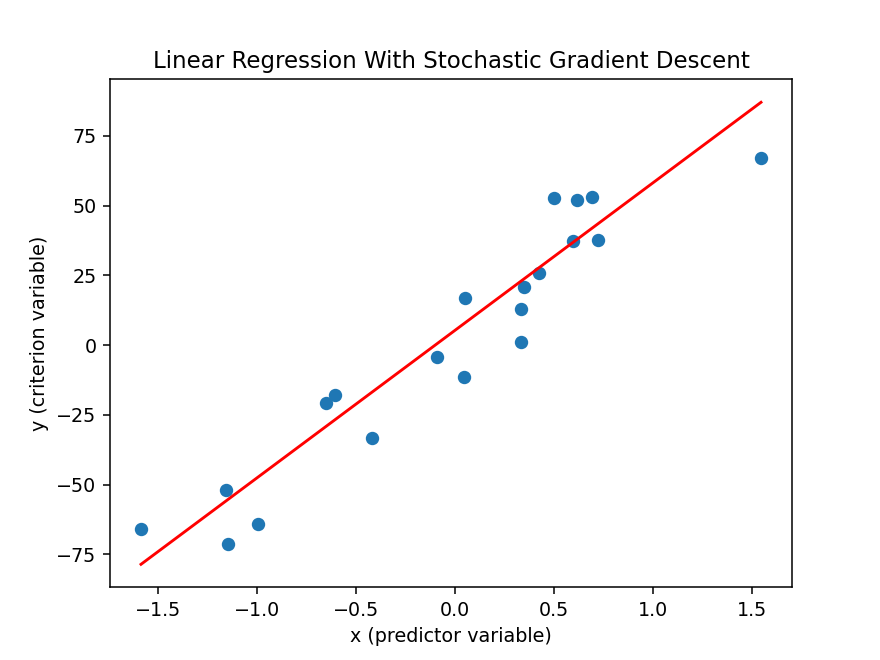

Text(0.5, 1.0, 'Linear Regression With Stochastic Gradient Descent')

In [3]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=20, n_features=1, noise=10, random_state=4)

lin_reg = SimpleLinearRegression_SGD()
lin_reg.fit(X, y)

plt.figure()
plt.scatter(X,y)

xs_line = np.linspace(np.min(X), np.max(X))
plt.plot(xs_line, lin_reg.b + lin_reg.w*xs_line, 'red')

plt.xlabel("x (predictor variable)")
plt.ylabel("y (criterion variable)")
plt.title("Linear Regression With Stochastic Gradient Descent")